# Iris Dataset Analysis

The Iris Dataset is a classic dataset in machine learning and statistics that contains measurements of the iris flowers' petals and sepals across three species (Setosa, Versicolor, and Virginica). It's commonly used for classification tasks. It contains 150 observations and 4 feature sets, as well as a label column. The features contained in the feature set relate to petal and sepal length and width in centimeters. The label column relates to the species of the iris flower.

For the sake of clarity (and as a little of a fun fact), the sepal of a flower, according to the [Encyclopaedia Britannica](https://www.britannica.com/science/sepal), is any of the outer parts of a flower that enclose and protect the unopened flower bud. The sepals on a flower are collectively referred to as the calyx. On the other hand, the petal of a flower, also according to the [Encyclopaedia Britannica](https://www.britannica.com/science/petal), in flowering plants, is a sterile floral part that usually functions as a visually conspicuous element of a flower. Petals are modified leaves and are often brightly coloured to attract specific pollinators to the flower.

## Attribution

Fisher, R.A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179-188.

# Import Libraries

Here I download the libraries and packages that I will be using throughout this analysis.

In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Dataset

Here I'll download the data from the `load_iris` function. The loaded data comes in a `sklearn.utils._bunch.Bunch` data type. The `Bunch` object is a specialized container used by SciKit-Learn to hold and manage datasets.

The next step is to display the data within the Iris `Bunch` object. It has a dictionary-like structure. The features are contained in the `data` key and the labels are found in the `target` key.

There’s an additional key-value pair in the Bunch object where the key is `target_names`. This value is a list of the names corresponding to the classes in the `target` array. Each name in `target_names` corresponds to a class label in the target array.

`feature_names` contains the names of the dataset's features (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)). They are then sent to the `cols` variable, which will then be used to set the column's names for the Pandas DataFrame, as the columns aren't named by default.

In [2]:
iris = load_iris()

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
cols = iris.feature_names

# Convert to Pandas DataFrame (and join Variables and Labels)

As mentioned previously, the downloaded data comes in a `sklearn.utils._bunch.Bunch` format. Therefore, I'll convert it into a Pandas DataFrame in order to make it easier to work with, for both the feature set and the targets.

After convertir both datasets to Pandas DataFrames, the `features` DataFrame is joined with the `targets` DataFrame. The goal of this is to have a complete DataFrame (meaning a DataFrame containing the feature set as well as the label/target column), which I can then perform Exploratory Data Analysis (EDA) on.

In [8]:
features = pd.DataFrame(iris['data'])
features.columns = cols

In [9]:
display(features)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
targets = pd.DataFrame(iris.target, columns=['labels'])

In [11]:
display(targets)

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
df = features.join(targets)
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Descriptive Statistics

Now that I have a complete Pandas DataFrame, I can begin to analyze it and understand it.

The first step get the shape of the DataFrame, which will allow me to better understand the dataset which I'm working with.

The next step is to apply the `.info()` method on the DataFrame. This will allow me to see if there's any `null` values (which there aren't), as well as see the data type for each column. As expected, from looking at the data in previous stages, the feature set is composed of floating point values and the target is made up of integers.

The final step is to apply the `.describe()` method on the DataFrame. This will allow me to get a statistical summary of the DataFrame.

In [13]:
df.shape

(150, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   labels             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Exploratory Data Analysis (EDA)

The next step is to perform Exploratory Data Analysis (EDA) on the data.

I'll first start by performing **Data Visualization** on the data.

The first set of plots I create are box plots, as they give me a better understanding of the distribution of the data.

The next sets of plots I create are histograms, as they show me a more nuanced distribution of the data by showing where more data points cluster within the same range.

Afterwards, I use Seaborn's `.pairplot()` visualization method, as it allows me to visualize how each feature relates to each other.

Finally, seeing as there is some correlation for some features, I apply `.corr()` on the DataFrame to get the correlations between the features. There is a high correlation between some features and some people might assume that the right thing to do **in this case** would be to remove one of the highly correlated features in order to avoid multi-collinearity and data redundancy. However, in this case, removing a feature is not necessary. Each feature contributes to distinguishing between the species of Iris effectively. Moreover, with only four features, removing one feature could lead to a loss of important information.

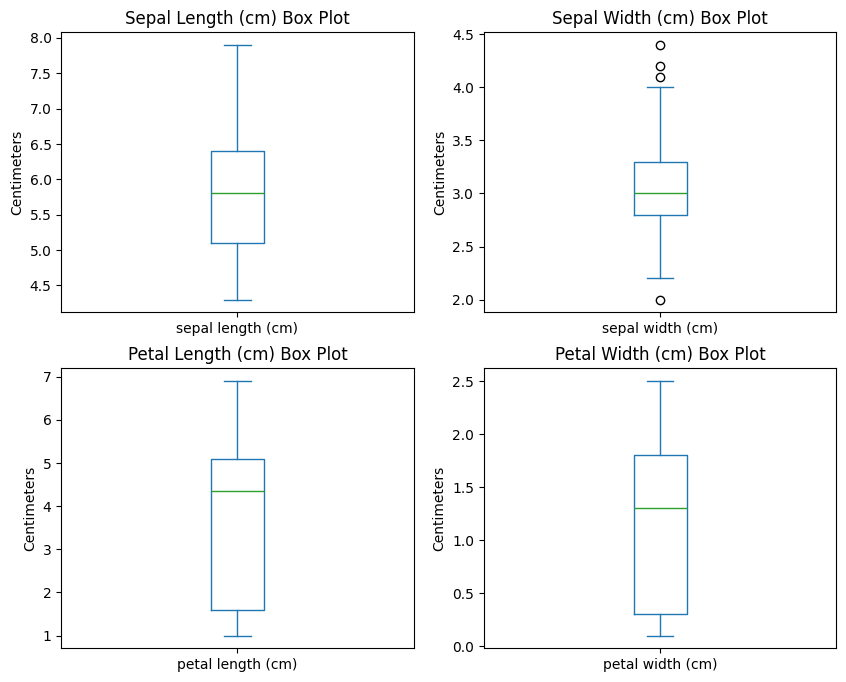

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

df['sepal length (cm)'].plot(kind='box', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length (cm) Box Plot')
axs[0, 0].set_ylabel('Centimeters')

df['sepal width (cm)'].plot(kind='box', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Width (cm) Box Plot')
axs[0, 1].set_ylabel('Centimeters')

df['petal length (cm)'].plot(kind='box', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length (cm) Box Plot')
axs[1, 0].set_ylabel('Centimeters')

df['petal width (cm)'].plot(kind='box', ax=axs[1, 1])
axs[1, 1].set_title('Petal Width (cm) Box Plot')
axs[1, 1].set_ylabel('Centimeters')

plt.show()

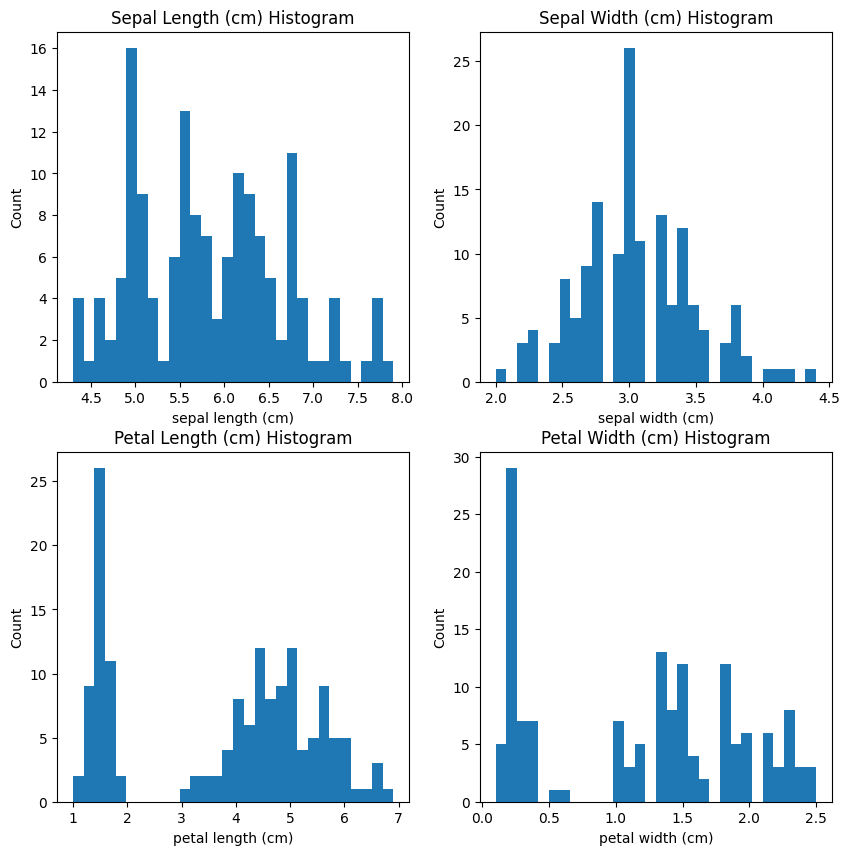

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

df['sepal length (cm)'].plot(kind='hist', ax=axs[0, 0], bins=30)
axs[0, 0].set_title('Sepal Length (cm) Histogram')
axs[0, 0].set_xlabel('sepal length (cm)')
axs[0, 0].set_ylabel('Count')

df['sepal width (cm)'].plot(kind='hist', ax=axs[0, 1], bins=30)
axs[0, 1].set_title('Sepal Width (cm) Histogram')
axs[0, 1].set_xlabel('sepal width (cm)')
axs[0, 1].set_ylabel('Count')

df['petal length (cm)'].plot(kind='hist', ax=axs[1, 0], bins=30)
axs[1, 0].set_title('Petal Length (cm) Histogram')
axs[1, 0].set_xlabel('petal length (cm)')
axs[1, 0].set_ylabel('Count')

df['petal width (cm)'].plot(kind='hist', ax=axs[1, 1], bins=30)
axs[1, 1].set_title('Petal Width (cm) Histogram')
axs[1, 1].set_xlabel('petal width (cm)')
axs[1, 1].set_ylabel('Count')

plt.show()

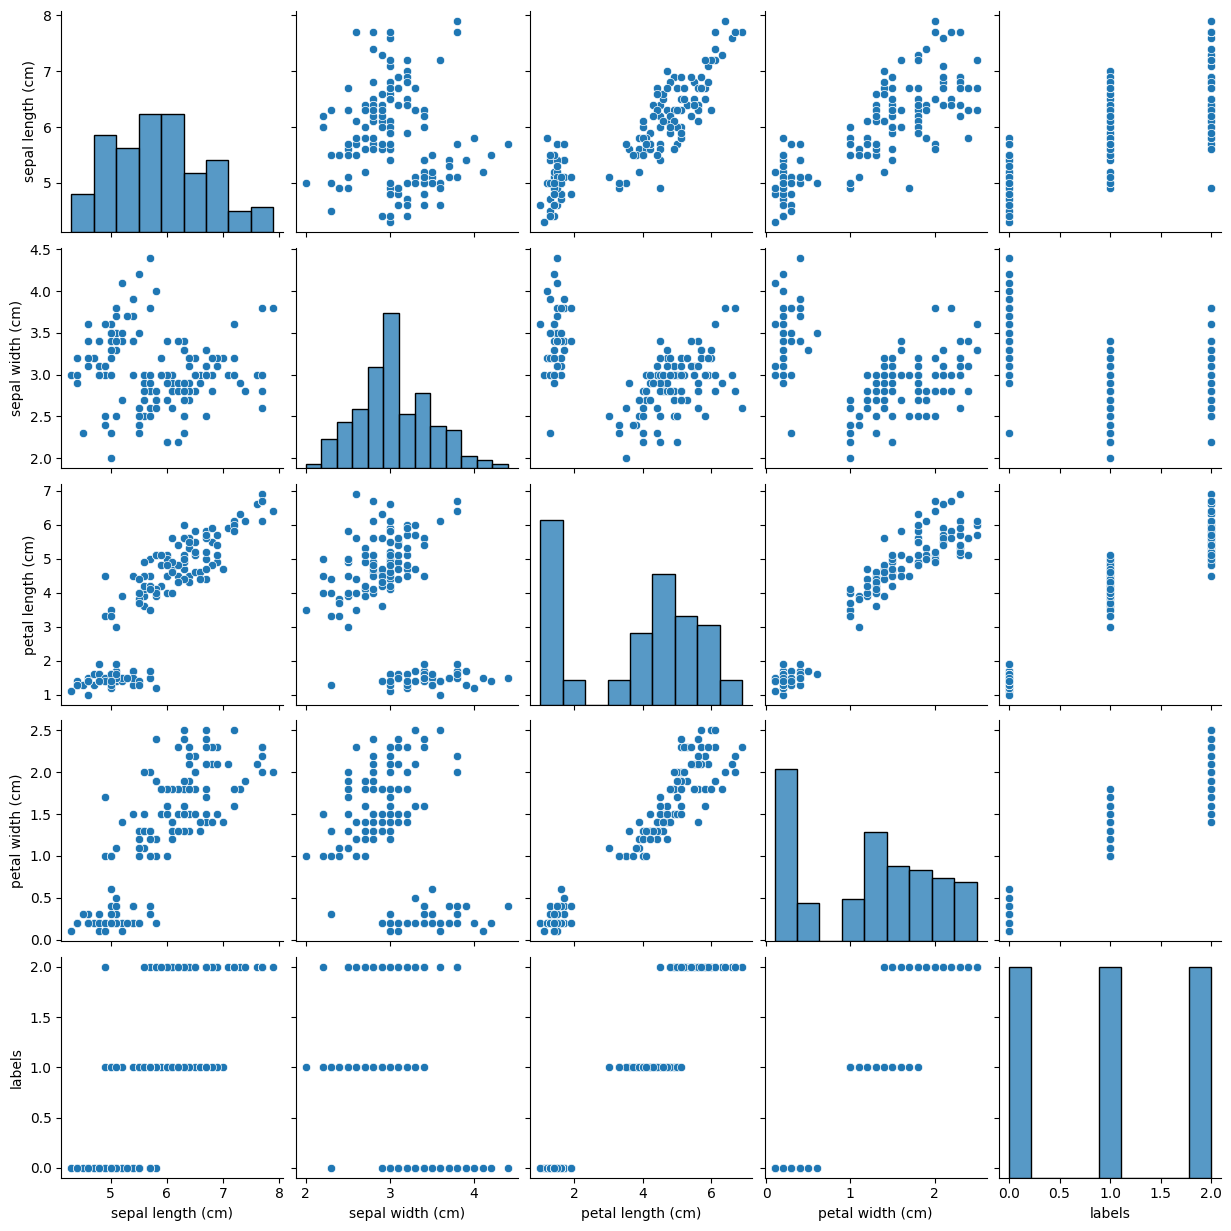

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
labels,0.782561,-0.426658,0.949035,0.956547,1.000000


# Data Processing

After analyzing and better understanding the data, the next step is to separate the data (I know that the data already came separated by default, but it did help the process to join them together, at least for the **Descriptive Analytics** and **Exploratory Data Analysis (EDA)** sections).

In this section I separate the DataFrame into the features columns (the independent variables) and the label column (the dependent variable). This will allow me to more easily work with the data in the next stage, **Modeling**.

In [20]:
X = df.drop('labels', axis=1)
y = df[['labels']]

# Modeling

This sections is where I now perform Statistical Modeling on the DataFrame in order to train a model and get predictions.

For this classification task, I went with a Decision Tree Classifier. I performed a GridSearchCV in order to find the best parameters for this given model, and now those parameters are used in the `DecisionTreeClassifier` function call. Next, I perform a 5-Fold Cross-Validation on the data in order to get an accurate performance score for the model. Afterwards, I perform a train/test split on the data in order to get an idea of how my model would perform under regular conditions.

Afterwards, I get some predictions (which I'll use to measure the model's performance in the next section, **Model Evaluation**). Finally, I measure the model's feature importances, which will allow me to see which features have the highest impact on the results of my model.

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=10)

In [22]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(clf, X, y, cv=cv)

print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.96666667 0.9        1.         0.93333333 0.93333333]
Average Cross-Validation Score: 0.9466666666666667


In [23]:
"""
parameters = {
    'criterion':['gini', 'entropy'],
    'max_depth':[1, 10, 30, 50, 100, None],
    'min_samples_split':[2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4, 5, None]
    }

clf = GridSearchCV(clf, parameters)
"""

"\nparameters = {\n    'criterion':['gini', 'entropy'],\n    'max_depth':[1, 10, 30, 50, 100, None],\n    'min_samples_split':[2, 4, 6, 8, 10],\n    'min_samples_leaf': [1, 2, 3, 4, 5],\n    'max_features': [1, 2, 3, 4, 5, None]\n    }\n\nclf = GridSearchCV(clf, parameters)\n"

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features=2,
                       min_samples_leaf=2, min_samples_split=10)

In [26]:
#print(clf.best_params_)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns).reset_index()
feature_importances.columns = ['Feature', 'Importance']
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
display(feature_importances)

,Feature,Importance
0,sepal length (cm),0.404639
1,petal width (cm),0.378185
2,petal length (cm),0.217176
3,sepal width (cm),0.000000


# Evaluation

This is where I get an idea of how accurate the model I trained is, and how it performs against data it hasn't seen previously. The model I trained has an accuracy of 98% and the confusion matrix for it looks very solid, as there's only one misclassified class in the entire testing dataset.

Afterwards, I create a new DataFrame that contains the `True Values` and the `Predicted Values`. This helps me visualize the model's results in a cleaner and more organized way.

Following that step, I create a mapping of the values using a Dictionary, that allows me to map the integer values to their class-equivalent values.

For the final step, I create a new Pandas DataFrame which displays the `True Values` against the `Predicted Values`. Moreover, if the `True Values` and the `Predicted Values` match, the shared value of the `Species` is displayed in the same row. Otherwise, it displays 'NaN' (The function returns `None` if the values aren't the same).

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
tn = iris.target_names
df_cm = pd.DataFrame(cm)
df_cm.columns = tn
df_cm.index = tn
display(df_cm)

Accuracy: 0.98


,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,18,0
virginica,0,1,10


In [30]:
y_test.reset_index(inplace=True)
y_test.drop('index', axis=1, inplace=True)

In [31]:
y_pred = pd.DataFrame(y_pred)
results = y_test.join(y_pred)
results.columns = ['True Values', 'Predicted Values']

In [32]:
#display(results)

In [33]:
map_labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [34]:
def get_value(dataframe):
    if dataframe['True Values'] == dataframe['Predicted Values']:
        return dataframe['True Values']
    else:
        return None

results['Species'] = results.apply(get_value, axis=1)

results['Species'] = results['Species'].map(map_labels)

display(results)

,True Values,Predicted Values,Species
0,2,2,virginica
1,1,1,versicolor
2,0,0,setosa
3,2,2,virginica
4,0,0,setosa
5,2,2,virginica
6,0,0,setosa
7,1,1,versicolor
8,1,1,versicolor
9,1,1,versicolor
